**Predict the price of an avacodo for the given dataset.**

**Source of Data : Kaggle**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [5]:
#read the dataframe
df=pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Column Info:
1. **Date:** Price recorded on a particular date
2. **AveragePrice:** Average price of the avacado
3. **Total Volume:** Total Volume of Avocado Sold
4. **4046:** Number of avocados with PLU 4040 sold
5. **4225:** Number of avocados with PLU 4225 sold
6. **4770:** Number of avocados with PLU 4770 sold
7. **TotalBags:** Total Number of bags sold
8. **SmallBags:** Total Number of bags sold which were small
9. **XLargeBags:** Total number of Xtra Large bags sold
10. **type:** type of avocado
11. **year:** year info
12. **Region:** Region in which the avocado was sold
    

Questions:
1. Is there a variation in price of avacodo as per the type?
2. On an average which tyoe of avacado sold the most?
3. Which type of avaocado had the highest volume in sales?
4. Is there any variation in the price of avocado as per the region?
5. Which year had the highest sales of avocado?
6. Does sales of avocado vary for different Seasons?
7. Does the sales price of avocado vary for differennt seasons?


In [6]:
#drop the unnamed column
df=df.drop(columns="Unnamed: 0",axis=1)

Lets check the starting and end dates of the data given

In [7]:
df.Date.min(),df.Date.max()

('2015-01-04', '2018-03-25')

**The prices of avocado are given from 2015 January to 2018 March**

In [8]:
df.describe().round(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00
mean,1.41,850644.01,293008.42,295154.57,22839.74,239639.20,182194.69,54338.09,3106.43,2016.15
std,0.40,3453545.36,1264989.08,1204120.40,107464.07,986242.40,746178.51,243965.96,17692.89,0.94
min,0.44,84.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015.00
25%,1.10,10838.58,854.07,3008.78,0.00,5088.64,2849.42,127.47,0.00,2015.00
50%,1.37,107376.76,8645.30,29061.02,184.99,39743.83,26362.82,2647.71,0.00,2016.00
75%,1.66,432962.29,111020.20,150206.86,6243.42,110783.37,83337.67,22029.25,132.50,2017.00
max,3.25,62505646.52,22743616.17,20470572.61,2546439.11,19373134.37,13384586.80,5719096.61,551693.65,2018.00


In [9]:
#check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


There are no missing values in this dataset. So we can continue on analyzing the data

In [10]:
df_eda=df

**Let's check the individual columns in the dataset how they are distributed**

**1.Average Price**

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

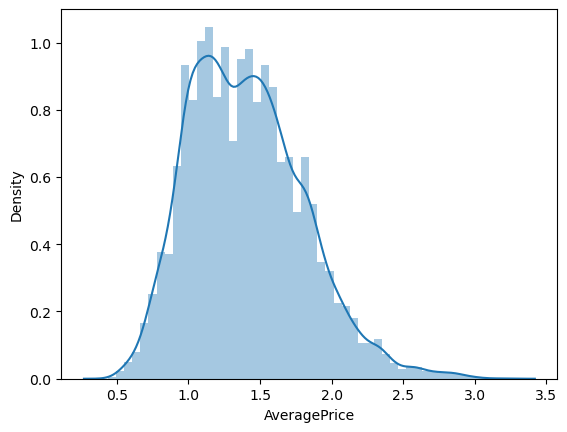

In [11]:
sns.distplot(df_eda['AveragePrice'], hist=True)

the price of the avacoados are normally distributed with most of the values lying between 1 and 1.75

**2.Total Volume**

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

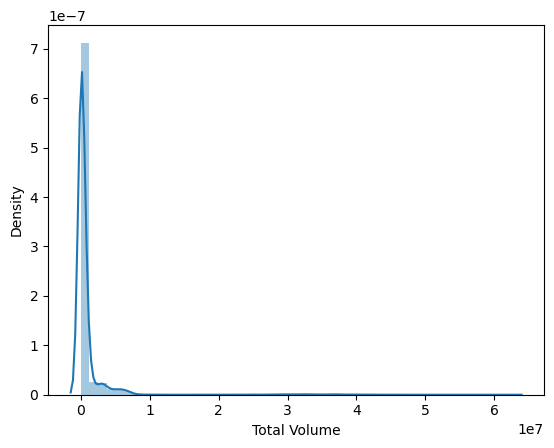

In [12]:
sns.distplot(df_eda['Total Volume'], hist=True)

 The total volume tends to be left skewed

**3.Total Bags,Small Bags,Large Bags and Extra Large Bags**

In [13]:
df_eda["Total Bags"].max(),df_eda["Total Bags"].min()

(19373134.37, 0.0)

In [14]:
pd.DataFrame(df_eda["Total Bags"].describe().round(2))

,Total Bags
count,18249.00
mean,239639.20
std,986242.40
min,0.00
25%,5088.64
50%,39743.83
75%,110783.37
max,19373134.37


<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

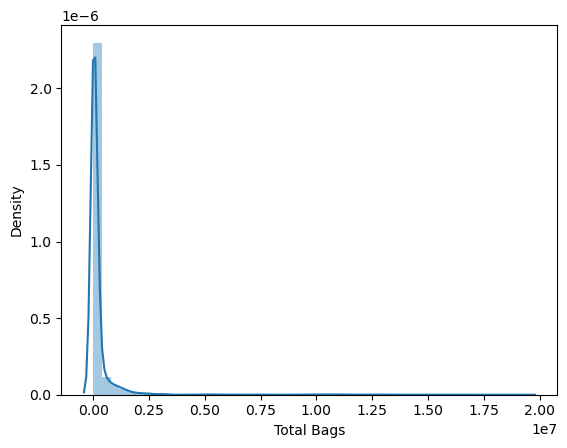

In [15]:
sns.distplot(df_eda['Total Bags'], hist=True)

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

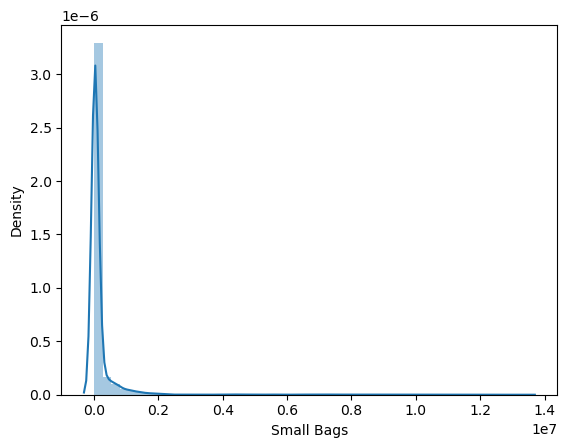

In [16]:
sns.distplot(df_eda['Small Bags'], hist=True)

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

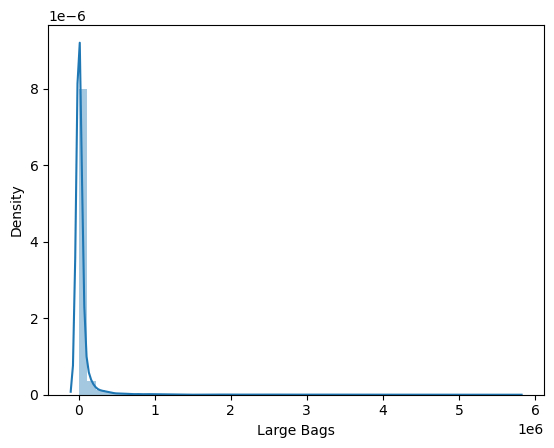

In [17]:
sns.distplot(df_eda['Large Bags'], hist=True)

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

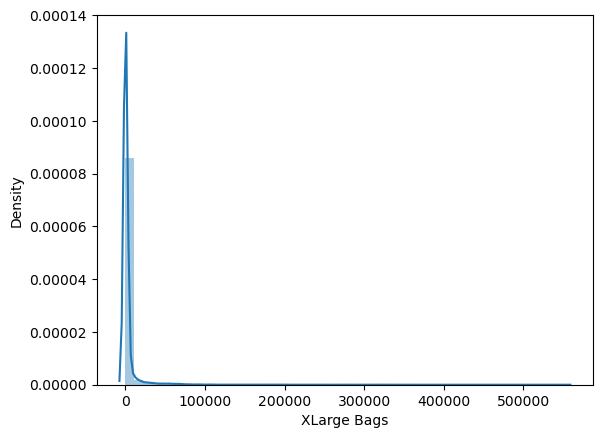

In [18]:
sns.distplot(df_eda['XLarge Bags'], hist=True)

The count of Bags is seem to be left skewed with total count of bags lying between 0 to 30K and the max value going upto 19373K

**4.Type**

Lets see the type of avacoados sold and their counts

AxesSubplot(0.125,0.11;0.775x0.77)


,type
conventional,9126
organic,9123


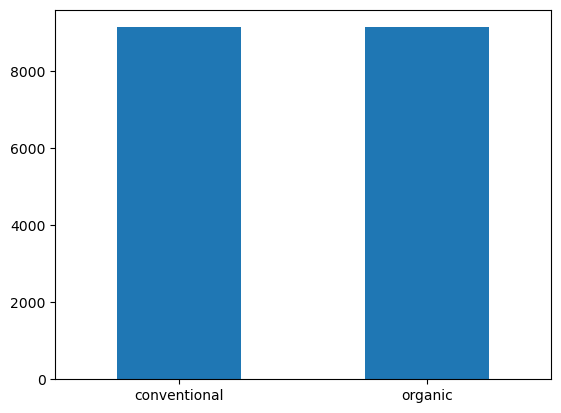

In [19]:
print(df_eda["type"].value_counts().plot(kind='bar',rot=0))
pd.DataFrame(df_eda["type"].value_counts())

There are same number of conventional and organic avacados sold over the period of time

**5.Region**

In [20]:
pd.DataFrame(df_eda["region"].value_counts())

,region
Albany,338
Sacramento,338
Northeast,338
NorthernNewEngland,338
Orlando,338
Philadelphia,338
PhoenixTucson,338
Pittsburgh,338
Plains,338
Portland,338


Looks like we have all the regions of same count

**6.Year**

In [21]:
pd.DataFrame(df_eda["year"].value_counts())

,year
2017,5722
2016,5616
2015,5615
2018,1296


we have equeal data for all the years except for 2018 since the data is available only upto march 2018

## Comparing price with different variables

In [22]:
pd.to_datetime(df['Date'],format='%Y-%m-%d')
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


**1.Price and Total Volume**

In [23]:
pd.DataFrame(df['Total Volume'].groupby(df['year']).sum().round(3))

,Total Volume
year,
2015,4.385469e+09
2016,4.820890e+09
2017,4.934306e+09
2018,1.382738e+09


In [24]:
df_eda['AveragePrice'].groupby(df_eda['type']).mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

In [25]:
df_eda.sort_values(by="Date")

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


In [26]:
df_eda

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [27]:
df_pred=df

In [28]:
df_pred=df_pred.drop(columns=["Date","year"],axis=1)

In [29]:
df_pred

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico


In [30]:
df_pred["type"].replace({"conventional":0,"organic":1},inplace=True)

In [31]:
df_pred

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,Albany
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,WestTexNewMexico


In [32]:
df_pred=df_pred.drop(columns="region",axis=1)
df_pred.drop(columns="AveragePrice",inplace=True)

In [33]:
X=df_pred
y=df["AveragePrice"]
X

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0
...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1


Perform train test split then fit the regression models which gives a better mape for train and test data.

In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)

In [36]:
X_train

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
4706,662145.29,139894.23,158417.00,19975.97,343858.09,340794.03,1498.14,1565.92,0
4786,186495.71,67313.99,51724.90,2894.98,64561.84,63970.47,591.37,0.00,0
16607,53711.04,1119.87,14609.29,414.22,37562.60,26290.94,11271.66,0.00,1
15738,38739.84,9392.30,44.43,0.00,29303.11,25806.88,3496.23,0.00,1
833,180186.23,24111.34,100758.01,158.29,55158.59,53929.04,1229.55,0.00,0
...,...,...,...,...,...,...,...,...,...
9372,3202.71,75.42,932.58,0.00,2194.71,2194.71,0.00,0.00,1
7291,357405.82,225241.39,38535.12,103.21,93526.10,60657.69,32650.35,218.06,0
17728,7422.15,587.11,1186.62,0.00,5648.42,5453.09,195.33,0.00,1
7293,529138.31,340439.27,66961.88,98.55,121638.61,67552.66,54085.95,0.00,0


**KNeighborsRegressor**

In [37]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_hat=knn_reg.predict(X_train)
print("The MAPE of KNN model for train data: ", np.mean(np.abs(y_train - y_hat)/y_train))
y_hat=knn_reg.predict(X_test)
print("The MAPE of KNN model for test data: ", np.mean(np.abs(y_test - y_hat)/y_test))
score = cross_val_score(knn_reg, X,y, cv = 10, scoring='neg_mean_absolute_error')
print('Positive MAE:', np.abs(score))

The MAPE of KNN model for train data:  0.09817019733530752
The MAPE of KNN model for test data:  0.12406142662034031
Positive MAE: [0.18011726 0.1942926  0.19170301 0.2252537  0.20113973 0.23556164
 0.24951123 0.27998575 0.31654904 0.33020724]


**Linear Regressor**

In [38]:
lin_reg=LinearRegression()
lin_reg.fit(X_train, y_train)
y_hat=lin_reg.predict(X_train)
print("The MAPE of Linear Regression model for train data: ", np.mean(np.abs(y_train - y_hat)/y_train))
y_hat=knn_reg.predict(X_test)
print("The MAPE of Linear Regression model for test data: ", np.mean(np.abs(y_test - y_hat)/y_test))
score = cross_val_score(lin_reg, X,y, cv = 10, scoring='neg_mean_absolute_error')
print('Positive MAE:', np.abs(score))

The MAPE of Linear Regression model for train data:  0.18341541069929504
The MAPE of Linear Regression model for test data:  0.12406142662034031
Positive MAE: [0.15908915 0.17633954 0.20136657 0.27748046 0.2306964  0.22219904
 0.24963624 0.31289911 0.32383721 0.30071973]


**Decision Tree Regressor**

In [39]:
des_reg=DecisionTreeRegressor(max_depth=3)
des_reg.fit(X_train,y_train)
y_hat=des_reg.predict(X_train)
np.mean(np.abs(y_train - y_hat)/y_train)
print("The MAPE of Decision Tree Regression model for train data: ", np.mean(np.abs(y_train - y_hat)/y_train))
y_hat=des_reg.predict(X_test)
np.mean(np.abs(y_test - y_hat)/y_test)
print("The MAPE of Decision Tree Regression model for test data: ", np.mean(np.abs(y_test - y_hat)/y_test))
score = cross_val_score(des_reg, X,y, cv = 10, scoring='neg_mean_absolute_error')
print('Positive MAE:', np.abs(score))

The MAPE of Decision Tree Regression model for train data:  0.1700293497122233
The MAPE of Decision Tree Regression model for test data:  0.16805249002197295
Positive MAE: [0.15850614 0.17116708 0.19711245 0.27608846 0.21267767 0.22694457
 0.23367759 0.28934371 0.30854246 0.31662224]


From the three models , **KNeighbors Regressor** performs well on the train and test data when compared to the other two models.

Let's perform Bias Variance Trade off for KNN model and see if we could optimize the model by selecting features which could lower the Bias and Variance

In [40]:
df_pred

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0
...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1


In [41]:
df_bv=df
df_bv=df_bv.drop(columns=['Date', 'year', 'region'],axis=1)
df_bv["type"].replace({"conventional":0,"organic":1},inplace=True)
df_bv

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1


In [42]:
18249-18294*0.3

12760.8

In [43]:
df_train=df_bv[0:12760]

df_test=df_bv[12761:-1]

In [44]:
df_train.columns[1:10]

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type'],
      dtype='object')

In [45]:
Bias_sq_lst=list()
var_lst=list()
for y in range(2,10):  #Pass the numbers so that for every iteration the number of columns increases
    dftrain=pd.DataFrame()
    dftrain=pd.concat([pd.DataFrame(df_train[df_train.columns[1:y]]),pd.DataFrame(df_train["AveragePrice"])],axis=1)
    preds = []
    pred_df = pd.DataFrame()
    X_test=df_test[df_train.columns[1:y]]
    y_test=df_test["AveragePrice"]
    
    for i in range(0,9):  #calculate pre_y for n number of times
        train=dftrain.sample(frac=1,random_state=i)   #shuffle the data every time with a different random state
        X_train=train[df_train.columns[1:y]]   
        X_train=X_train[0:10000] #take a part of the shuffled train data to get different y_pre values for different train data
        y_train=train["AveragePrice"]
        y_train=y_train[0:10000]  #slice the y_train data similar to the x_train
        lr=LinearRegression()
        lr.fit(X_train,y_train)
        pre_y=lr.predict(X_test)
        pred_df=pd.concat([pred_df,pd.DataFrame(pre_y)],axis=1)

    E_yhat=pred_df.mean(axis=1)  # mean of each row
    Bias_sq=np.mean((np.array(y_test)-np.array(E_yhat))**2)   # [y-E[y_hat]]**2
    Bias_sq
    Bias_sq_lst.append(Bias_sq)
    var = np.array([])
    for i in np.arange(pred_df.shape[0]):
        var = np.append(var, np.var(pred_df.iloc[i][:]))  
    var_lst.append(np.mean(var)) #E(Var)

In [46]:
Bias_sq_lst,var_lst

([0.2869106530202246,
  0.2867983504513307,
  0.28710084942273684,
  0.28695667327945246,
  1.8309511762670752,
  1.6812961512021527,
  1.4060599889332726,
  1.4496812987915695],
 [2.65699953880554e-06,
  2.6613940365085844e-06,
  2.628157062631878e-06,
  2.6650644318689905e-06,
  0.32986998955603364,
  0.36660801277666555,
  0.41637203831678515,
  0.4252408441932321])

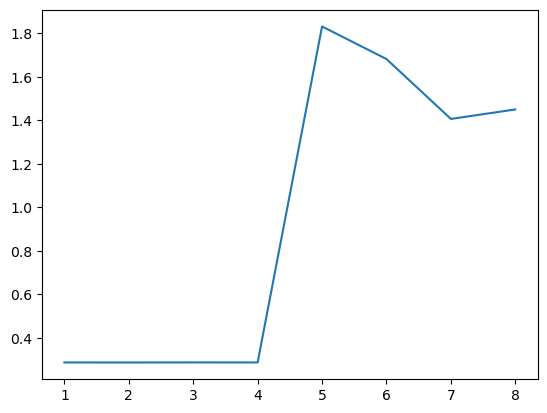

In [47]:
features=[1,2,3,4,5,6,7,8]
plt.plot(features,Bias_sq_lst)
plt.show()

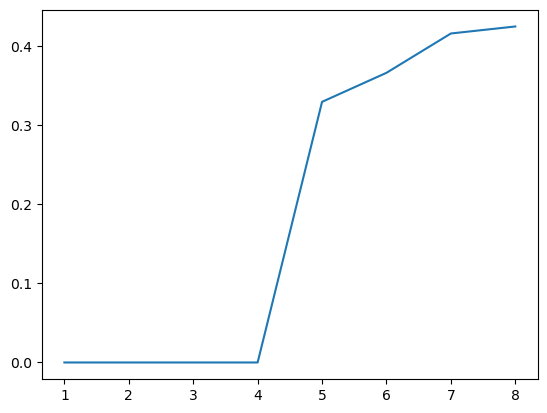

In [48]:
features=[1,2,3,4,5,6,7,8]
plt.plot(features,var_lst)
plt.show()

In [49]:
X_2=df_pred[['Total Volume', '4046', '4225', '4770','Total Bags','Small Bags','Large Bags','type']]
y_2=df["AveragePrice"]
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, random_state = 10, test_size = 0.3)
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_hat=knn_reg.predict(X_train)
print("The MAPE of KNN model for train data: ", np.mean(np.abs(y_train - y_hat)/y_train))
y_hat=knn_reg.predict(X_test)
print("The MAPE of KNN model for test data: ", np.mean(np.abs(y_test - y_hat)/y_test))

The MAPE of KNN model for train data:  0.098214605281927
The MAPE of KNN model for test data:  0.12441064872664667


In [50]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler, MaxAbsScaler, RobustScaler, QuantileTransformer, PowerTransformer,Normalizer

**MinMaxScaler**

In [51]:
scaler=MinMaxScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)
X_train=pd.DataFrame(X_train_scale,columns=scaler.get_feature_names_out())
X_test=pd.DataFrame(X_test_scale,columns=scaler.get_feature_names_out())
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_hat=knn_reg.predict(X_train)
print("The MAPE of KNN model for train data: ", np.mean(np.abs(y_train - y_hat)/y_train))
y_hat=knn_reg.predict(X_test)
print("The MAPE of KNN model for test data: ", np.mean(np.abs(y_test - y_hat)/y_test))


The MAPE of KNN model for train data:  0.09042362140610617
The MAPE of KNN model for test data:  0.1102141245933068


**StandardScaler**

In [52]:
X_2=df_pred[['Total Volume', '4046', '4225', '4770','Total Bags','type']]
y_2=df["AveragePrice"]
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, random_state = 10, test_size = 0.3)
scaler=StandardScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)
X_train=pd.DataFrame(X_train_scale,columns=scaler.get_feature_names_out())
X_test=pd.DataFrame(X_test_scale,columns=scaler.get_feature_names_out())
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_hat=knn_reg.predict(X_train)
print("The MAPE of KNN model for train data: ", np.mean(np.abs(y_train - y_hat)/y_train))
y_hat=knn_reg.predict(X_test)
print("The MAPE of KNN model for test data: ", np.mean(np.abs(y_test - y_hat)/y_test))

The MAPE of KNN model for train data:  0.10275394266822088
The MAPE of KNN model for test data:  0.12878220057025205


**MaxAbsScaler**

In [53]:
X_2=df_pred[['Total Volume', '4046', '4225', '4770','Total Bags','type']]
y_2=df["AveragePrice"]
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, random_state = 10, test_size = 0.3)
scaler=MaxAbsScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)
X_train=pd.DataFrame(X_train_scale,columns=scaler.get_feature_names_out())
X_test=pd.DataFrame(X_test_scale,columns=scaler.get_feature_names_out())
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_hat=knn_reg.predict(X_train)
print("The MAPE of KNN model for train data: ", np.mean(np.abs(y_train - y_hat)/y_train))
y_hat=knn_reg.predict(X_test)
print("The MAPE of KNN model for test data: ", np.mean(np.abs(y_test - y_hat)/y_test))

The MAPE of KNN model for train data:  0.10247969212052876
The MAPE of KNN model for test data:  0.1280293970733706


**RobustScaler**

In [54]:
X_2=df_pred[['Total Volume', '4046', '4225','Total Bags','4770','Small Bags','Large Bags','type']]
y_2=df["AveragePrice"]
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, random_state = 10, test_size = 0.3)
scaler=RobustScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)
X_train=pd.DataFrame(X_train_scale,columns=scaler.get_feature_names_out())
X_test=pd.DataFrame(X_test_scale,columns=scaler.get_feature_names_out())
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_hat=knn_reg.predict(X_train)
print("The MAPE of KNN model for train data: ", np.mean(np.abs(y_train - y_hat)/y_train))
y_hat=knn_reg.predict(X_test)
print("The MAPE of KNN model for test data: ", np.mean(np.abs(y_test - y_hat)/y_test))

The MAPE of KNN model for train data:  0.09229137642163601
The MAPE of KNN model for test data:  0.11315249533409308


**QuantileTransformer**

In [55]:
X_2=df_pred[['Total Volume', '4046', '4225', '4770','Total Bags','Small Bags','Large Bags','type']]
y_2=df["AveragePrice"]
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, random_state = 10, test_size = 0.3)
scaler=QuantileTransformer()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)
X_train=pd.DataFrame(X_train_scale,columns=scaler.get_feature_names_out())
X_test=pd.DataFrame(X_test_scale,columns=scaler.get_feature_names_out())
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_hat=knn_reg.predict(X_train)
print("The MAPE of KNN model for train data: ", np.mean(np.abs(y_train - y_hat)/y_train))
y_hat=knn_reg.predict(X_test)
print("The MAPE of KNN model for test data: ", np.mean(np.abs(y_test - y_hat)/y_test))

The MAPE of KNN model for train data:  0.08062673812388939
The MAPE of KNN model for test data:  0.1002785143324587


**PowerTransformer**

In [56]:
X_2=df_pred[['Total Volume', '4046', '4225', '4770','Total Bags','Small Bags','Large Bags','type']]
y_2=df["AveragePrice"]
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, random_state = 14, test_size = 0.3,shuffle=True)
scaler=PowerTransformer()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)
X_train=pd.DataFrame(X_train_scale,columns=scaler.get_feature_names_out())
X_test=pd.DataFrame(X_test_scale,columns=scaler.get_feature_names_out())
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_hat=knn_reg.predict(X_train)
X_2_scale=scaler.fit_transform(X_2)
X_2_scale=pd.DataFrame(X_2_scale,columns=scaler.get_feature_names_out())
score = cross_val_score(knn_reg, X_2_scale,y_2, cv = 10, scoring='neg_mean_absolute_error')
print("The MAPE of KNN model for train data: ", np.mean(np.abs(y_train - y_hat)/y_train))
y_hat=knn_reg.predict(X_test)
print("The MAPE of KNN model for test data: ", np.mean(np.abs(y_test - y_hat)/y_test))
print('Positive MAE:', np.abs(score))

The MAPE of KNN model for train data:  0.07879399238311097
The MAPE of KNN model for test data:  0.0982769089877822
Positive MAE: [0.15177863 0.17183233 0.16632767 0.21231342 0.18870356 0.22413589
 0.22678795 0.25870027 0.27161425 0.29806798]


In [57]:
pd.DataFrame({"columns":X_train.columns,'lambda':scaler.lambdas_})

,columns,lambda
0,Total Volume,-0.018329
1,4046,0.039656
2,4225,0.062246
3,4770,-0.016932
4,Total Bags,0.032609
5,Small Bags,0.071145
6,Large Bags,0.071957
7,type,-0.001423


**Normalizer**

In [58]:
X_2=df_pred[['Total Volume', '4046', '4225', '4770','Total Bags','Small Bags','Large Bags','type']]
y_2=df["AveragePrice"]
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, random_state = 10, test_size = 0.3)
scaler=Normalizer()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)
X_train=pd.DataFrame(X_train_scale,columns=['Total Volume', '4046', '4225', '4770','Total Bags','Small Bags','Large Bags','type'])
X_test=pd.DataFrame(X_test_scale,columns=['Total Volume', '4046', '4225', '4770','Total Bags','Small Bags','Large Bags','type'])
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_hat=knn_reg.predict(X_train)
print("The MAPE of KNN model for train data: ", np.mean(np.abs(y_train - y_hat)/y_train))
y_hat=knn_reg.predict(X_test)
print("The MAPE of KNN model for test data: ", np.mean(np.abs(y_test - y_hat)/y_test))
score = cross_val_score(knn_reg, X_2,y_2, cv = 10, scoring='neg_mean_absolute_error')
print('Positive MAE:', np.abs(score))

The MAPE of KNN model for train data:  0.13773047141786543
The MAPE of KNN model for test data:  0.171035613999703
Positive MAE: [0.18081644 0.19396822 0.19188712 0.22538082 0.20093151 0.23549699
 0.24944986 0.28014904 0.31665425 0.3301886 ]


In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
rf_regressor = RandomForestRegressor()

In [61]:
X_2=df_pred[['Total Volume', '4046', '4225', '4770','Total Bags','Small Bags','Large Bags','type']]
y_2=df["AveragePrice"]
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, random_state = 10, test_size = 0.3)
scaler=Normalizer()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)
X_train=pd.DataFrame(X_train_scale,columns=['Total Volume', '4046', '4225', '4770','Total Bags','Small Bags','Large Bags','type'])
X_test=pd.DataFrame(X_test_scale,columns=['Total Volume', '4046', '4225', '4770','Total Bags','Small Bags','Large Bags','type'])
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
y_hat=rf_regressor.predict(X_train)
print("The MAPE of RandomForest model for train data: ", np.mean(np.abs(y_train - y_hat)/y_train))
y_hat=knn_reg.predict(X_test)-----WEEQint("The MAPE of RandomForest model for test data: ", np.mean(np.abs(y_test - y_hat)/y_test))
score = cross_val_score(knn_reg, X_2,y_2, cv = 10, scoring='neg_mean_absolute_error')
print('Positive MAE:', np.abs(score))

The MAPE of KNN model for train data:  0.04166293637564027
The MAPE of KNN model for test data:  0.171035613999703
Positive MAE: [0.18081644 0.19396822 0.19188712 0.22538082 0.20093151 0.23549699
 0.24944986 0.28014904 0.31665425 0.3301886 ]


In [ ]:
X_2=df_pred[['Total Volume', '4046', '4225', '4770','Total Bags','Small Bags','Large Bags','type']]
y_2=df["AveragePrice"]
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, random_state = 10, test_size = 0.3)
scaler=Normalizer()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)
X_train=pd.DataFrame(X_train_scale,columns=['Total Volume', '4046', '4225', '4770','Total Bags','Small Bags','Large Bags','type'])
X_test=pd.DataFrame(X_test_scale,columns=['Total Volume', '4046', '4225', '4770','Total Bags','Small Bags','Large Bags','type'])
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
y_hat=rf_regressor.predict(X_train)
print("The MAPE of RandomForest model for train data: ", np.mean(np.abs(y_train - y_hat)/y_train))
y_hat=knn_reg.predict(X_test)-----WEEQint("The MAPE of RandomForest model for test data: ", np.mean(np.abs(y_test - y_hat)/y_test))
score = cross_val_score(knn_reg, X_2,y_2, cv = 10, scoring='neg_mean_absolute_error')
print('Positive MAE:', np.abs(score))